In [1]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate
from pycbc.types import TimeSeries

# Read data and remove low frequency content
fname = './GW/H-H1_LOSC_4_V2-1126259446-32.gwf'
h1 = highpass_fir(read_frame(fname, 'H1:LOSC-STRAIN'), 15.0, 8)

# estimate the noise spectrum and whiten
psd = interpolate(welch(h1), 1.0 / 32)
white_strain = (h1.to_frequencyseries() / psd ** 0.5 * psd.delta_f).to_timeseries()

# remove some of the high and low frequencies
smooth = highpass_fir(white_strain, 25, 8)
smooth = lowpass_fir(white_strain, 250, 8)

# slow the data down by a factor of 4
smooth = TimeSeries(smooth, delta_t=smooth.delta_t*4)

#strech out and shift the frequency upwards by 300 Hz to aid human hearing
frequency_shift = 300.0
fdata = smooth.to_frequencyseries()
fdata.roll(int(frequency_shift / fdata.delta_f))
smooth = fdata.to_timeseries()

In [4]:
from matplotlib import pyplot as plt

In [5]:
plt.figure(figsize=[10,4])

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

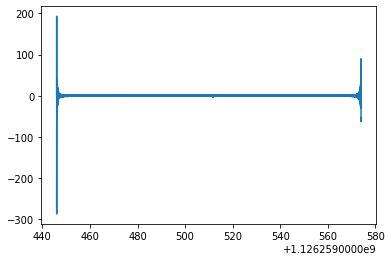

In [6]:
plt.plot(smooth.sample_times,smooth)

In [7]:
#Take slice around signal
smooth = smooth[len(smooth)//2 - 1500:len(smooth)//2 + 3000]

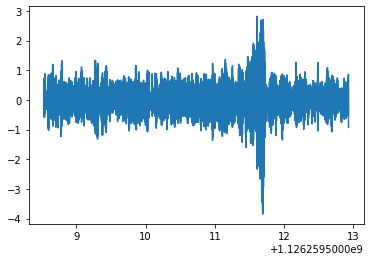

In [8]:
plt.plot(smooth.sample_times,smooth)

In [9]:
len(smooth)

4500

In [10]:
smooth.sample_rate

1024.0

In [11]:
smooth = smooth[len(smooth)//2:]

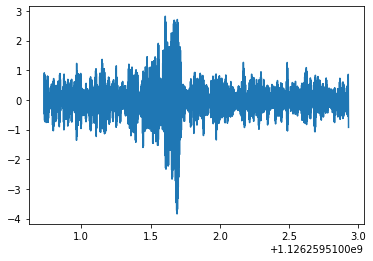

In [12]:
plt.plot(smooth.sample_times,smooth)

In [13]:
smooth = smooth[500:len(smooth)//2]

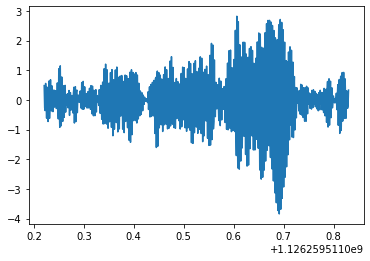

In [14]:
plt.plot(smooth.sample_times,smooth)

In [15]:
smooth.save_to_wav('./GW/gw150914_h1_chirp.wav')

In [16]:
smooth.sample_rate

1024.0

In [17]:
smooth.sample_times[-1] - smooth.sample_times[0]

0.609375